# Density-based clustering (DBSCAN)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

vehicle_df = pd.read_csv("vehicle.csv").dropna()

In [3]:
vehicle_df.shape

(813, 19)

In [4]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 813 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  813 non-null    int64  
 1   circularity                  813 non-null    float64
 2   distance_circularity         813 non-null    float64
 3   radius_ratio                 813 non-null    float64
 4   pr.axis_aspect_ratio         813 non-null    float64
 5   max.length_aspect_ratio      813 non-null    int64  
 6   scatter_ratio                813 non-null    float64
 7   elongatedness                813 non-null    float64
 8   pr.axis_rectangularity       813 non-null    float64
 9   max.length_rectangularity    813 non-null    int64  
 10  scaled_variance              813 non-null    float64
 11  scaled_variance.1            813 non-null    float64
 12  scaled_radius_of_gyration    813 non-null    float64
 13  scaled_radius_of_gyration

In [5]:
vehicle_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [6]:
# Class is categorical, use value_counts function
pd.value_counts(vehicle_df["class"])

/var/folders/wv/2h0s113s3fd7yw2x8rkjxhxh0000gn/T/ipykernel_58236/890091369.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(vehicle_df["class"])


class
car    413
bus    205
van    195
Name: count, dtype: int64

/var/folders/wv/2h0s113s3fd7yw2x8rkjxhxh0000gn/T/ipykernel_58236/3436144477.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(vehicle_df["class"]).plot(kind="bar")


<Axes: xlabel='class'>

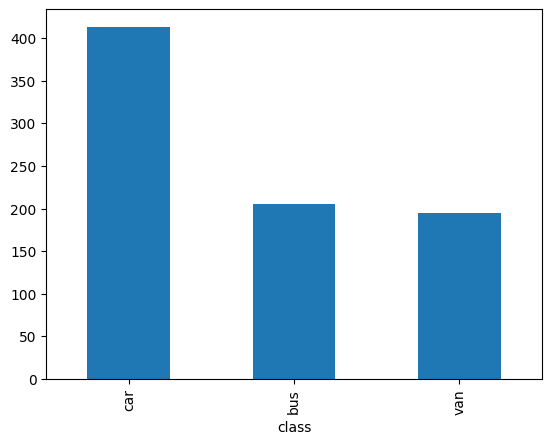

In [7]:
pd.value_counts(vehicle_df["class"]).plot(kind="bar")

/var/folders/wv/2h0s113s3fd7yw2x8rkjxhxh0000gn/T/ipykernel_58236/1966965508.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(vehicle_df["class"]).hist(bins=300)


<Axes: >

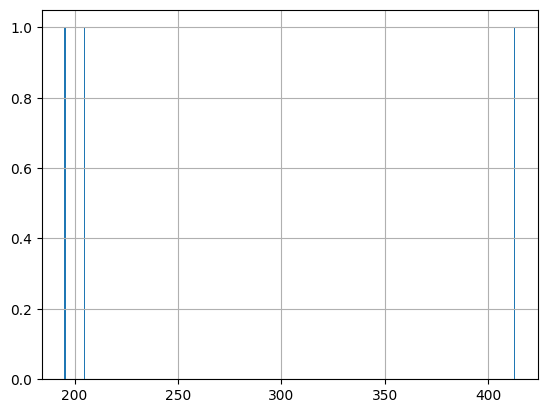

In [8]:
pd.value_counts(vehicle_df["class"]).hist(bins=300)

In [9]:
vehicle_df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [10]:
# Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we 
# go for any clustering methods. You can use zscore function to do this.

In [11]:
vehicle_df_1 = vehicle_df.drop("class", axis=1)

In [12]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Standardize features by removing the mean and scaling to unit variance
# This does z score normalization by default so no need to use scipy zscore function
sc = StandardScaler()
X_standard = sc.fit_transform(vehicle_df_1)

In [13]:
print("Standardized Data:")
print(X_standard)

Standardized Data:
[[ 0.16323063  0.52040788  0.06066872 ...  0.37128716 -0.3218087
   0.17183708]
 [-0.32287376 -0.61912319  0.12406675 ...  0.14710858  0.00340009
   0.44231829]
 [ 1.2569655   0.84598818  1.51882349 ... -0.41333788 -0.1592043
   0.03659647]
 ...
 [ 1.5000177   1.49714879  1.20183332 ... -0.97378433 -0.3218087
   0.7127995 ]
 [-0.93050425 -1.43307395 -0.25632145 ...  1.38009078  0.16600449
  -0.09864413]
 [-1.05203035 -1.43307395 -1.01709784 ...  0.59546574 -0.4844131
  -0.77484716]]


In [14]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.neighbors import NearestNeighbors

In [15]:
db_default = DBSCAN(eps=0.0375, min_samples=6).fit(X_standard)
labels = db_default.labels_

In [21]:
list(set(labels)) 

[np.int64(-1)]

We are not getting any results for clustering here. In other words, there will not
be any logical results of clustering since we have not provided the optimal values for minPts and ϵ.

In [22]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_standard)
distances, indices = nbrs.kneighbors(X_standard)

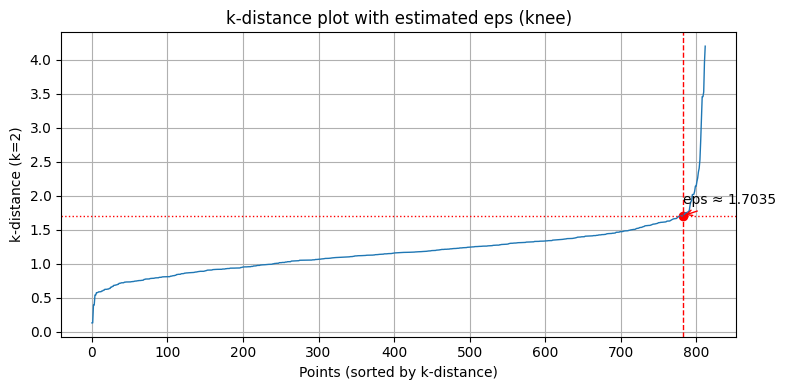

In [27]:
# Sort neighbor distances and extract the k-distance (2nd column)
distances = np.sort(distances, axis=0)
k_dist = distances[:, 1]

# Find the 'knee' (elbow) using the distance-to-line method
n = len(k_dist)
idxs = np.arange(n)

# Normalize coordinates so the distance measure is scale-invariant
x_norm = (idxs - idxs.min()) / (idxs.max() - idxs.min())
y_norm = (k_dist - k_dist.min()) / (k_dist.max() - k_dist.min())

# Line between first and last normalized points
x1, y1 = x_norm[0], y_norm[0]
x2, y2 = x_norm[-1], y_norm[-1]

# Perpendicular distance from each point to that line
num = np.abs((y2 - y1) * x_norm - (x2 - x1) * y_norm + x2*y1 - y2*x1)
den = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
dist_to_line = num / den
knee_idx = np.argmax(dist_to_line)
eps_value = k_dist[knee_idx]

# Plot k-distance and mark the estimated eps (knee)
plt.figure(figsize=(8, 4))
plt.plot(k_dist, lw=1)
plt.axvline(knee_idx, color='red', linestyle='--', lw=1)
plt.axhline(eps_value, color='red', linestyle=':', lw=1)
plt.scatter([knee_idx], [eps_value], color='red')
plt.annotate(f'eps ≈ {eps_value:.4f}', xy=(knee_idx, eps_value), xytext=(knee_idx, eps_value*1.1),
             arrowprops=dict(arrowstyle='->', color='red'))
plt.xlabel('Points (sorted by k-distance)')
plt.ylabel('k-distance (k=2)')
plt.title('k-distance plot with estimated eps (knee)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
db_default = DBSCAN(eps=1.7, min_samples=10)
db_default.fit(X_standard)

,eps,1.7
,min_samples,10
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [30]:
clusters = db_default.labels_

In [31]:
list(set(clusters))

[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(-1)]

In [32]:
colors = ['blue', 'red', 'orange', 'green', 'purple', 'black', 'brown', 'cyan', 'yellow', 'pink']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

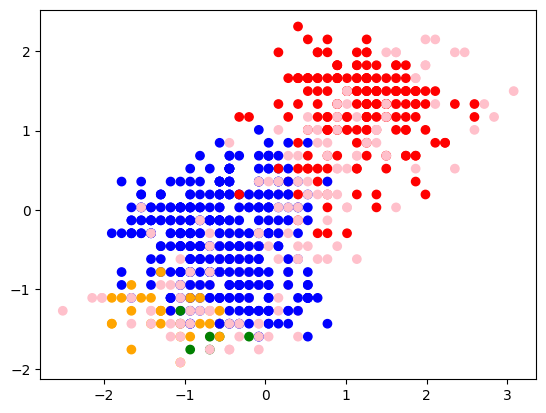

In [34]:
plt.scatter(X_standard[:, 0], X_standard[:, 1], c=vectorizer(clusters))

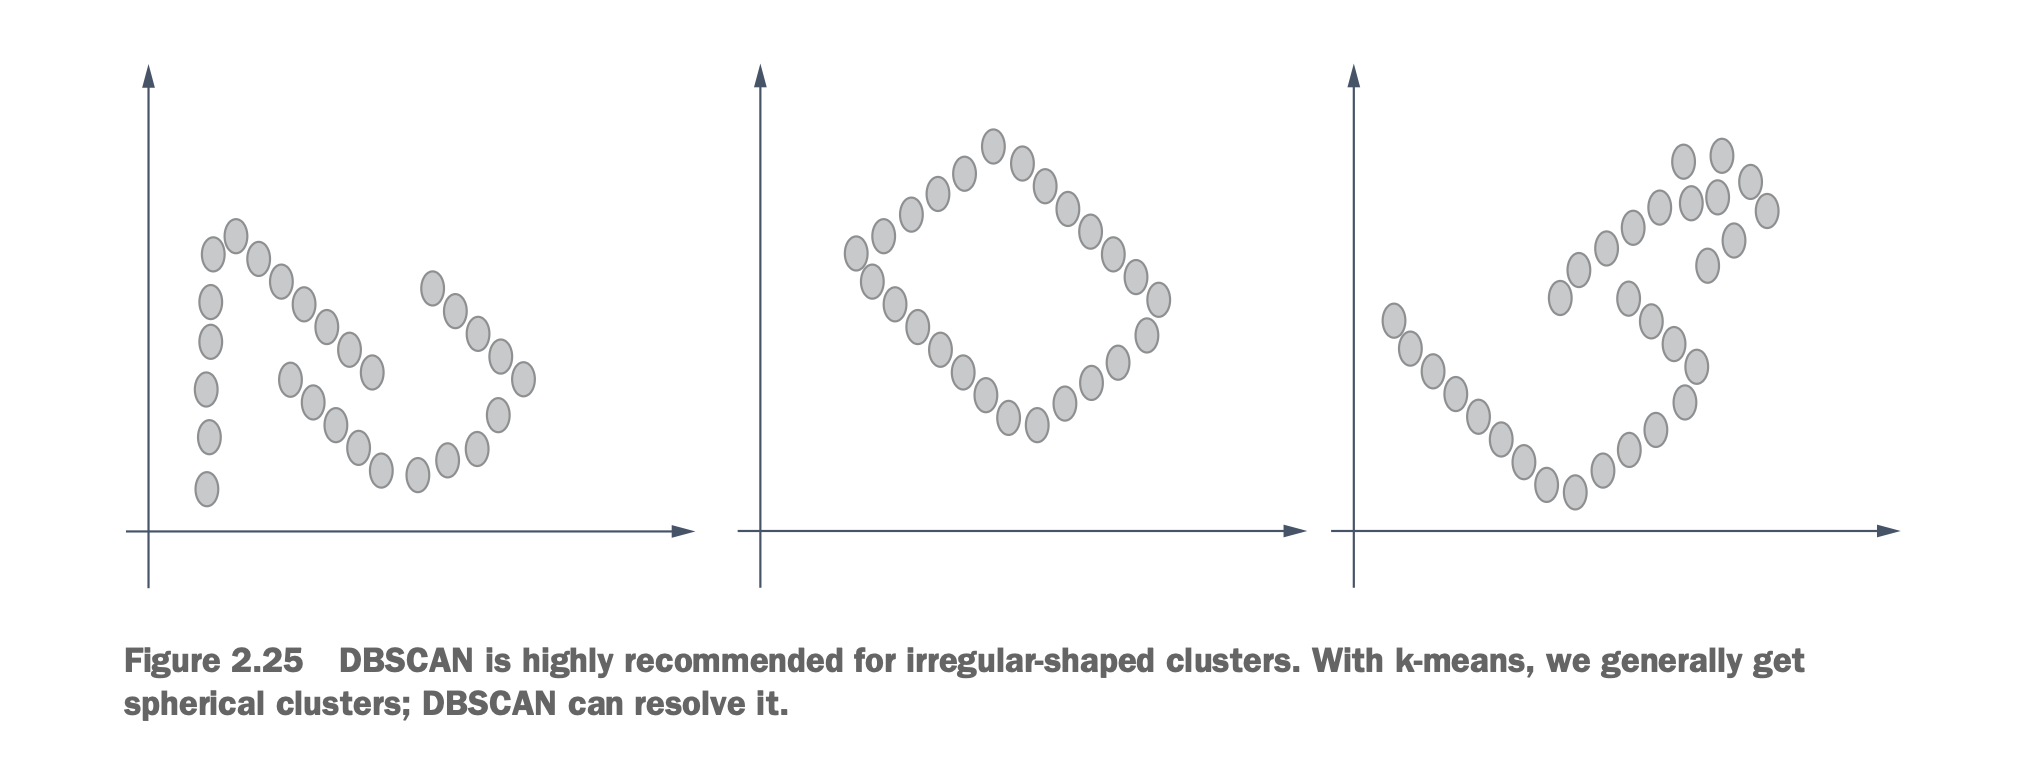

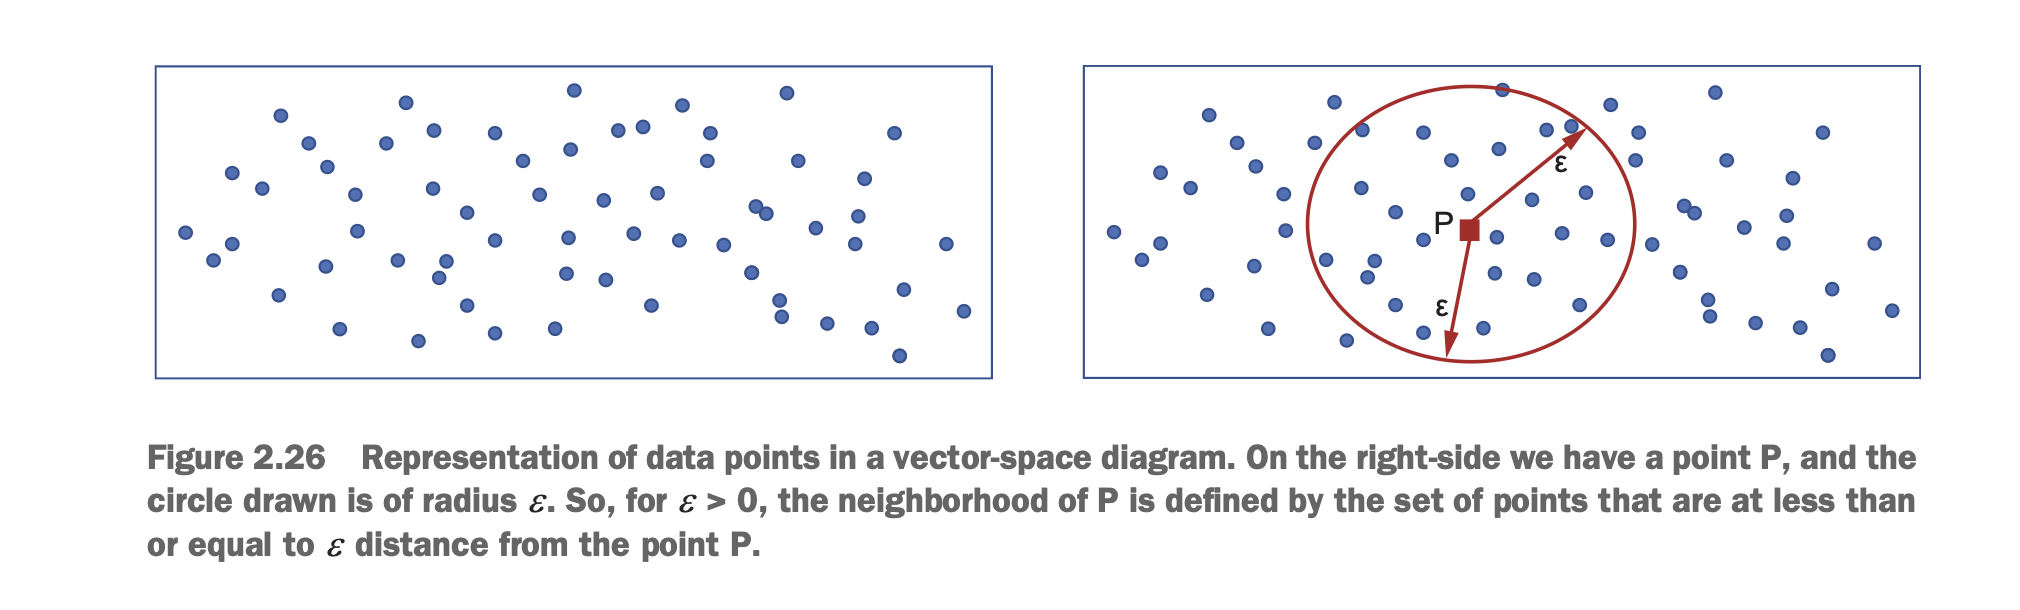

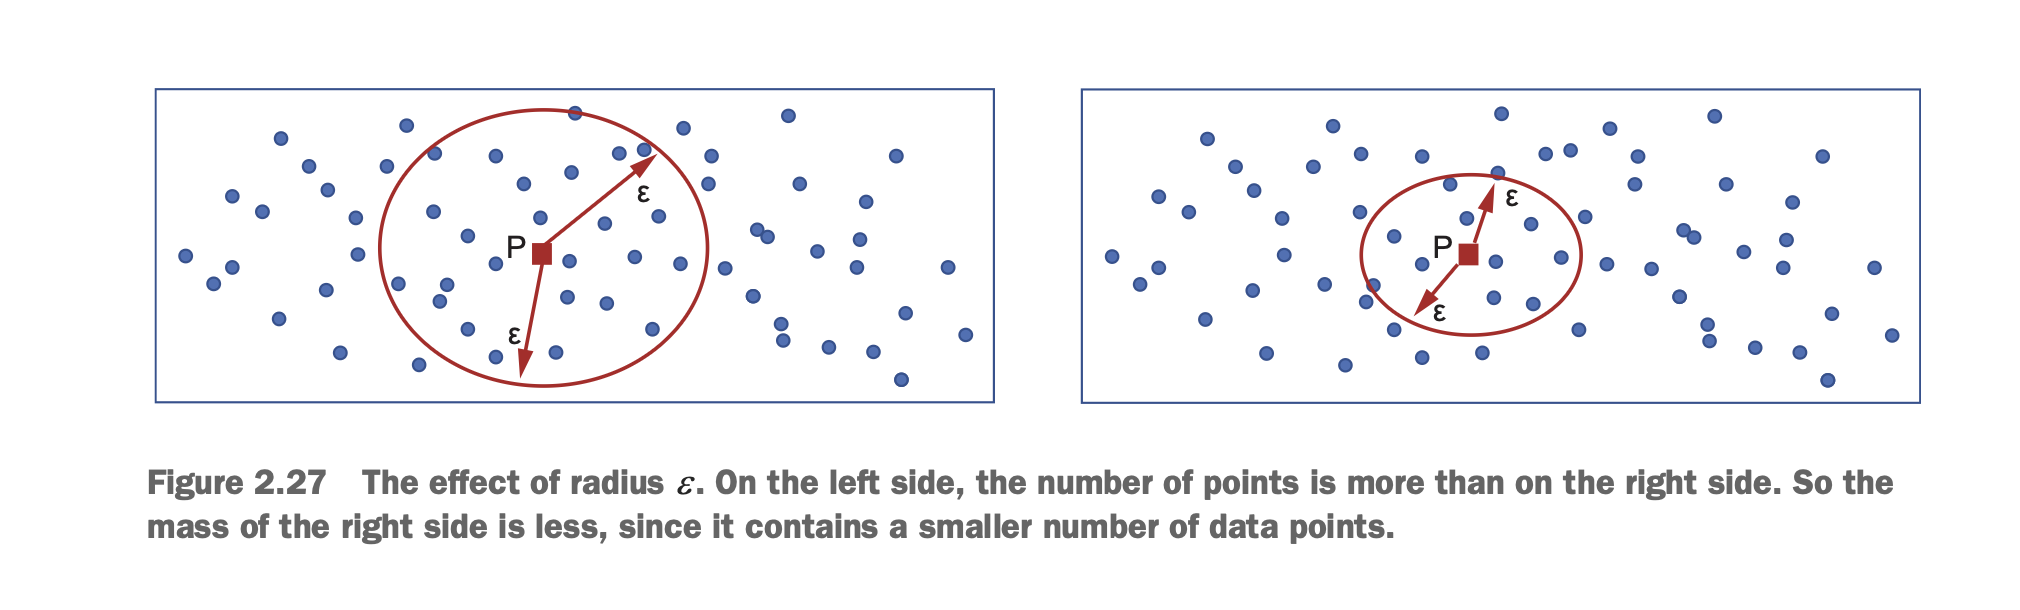

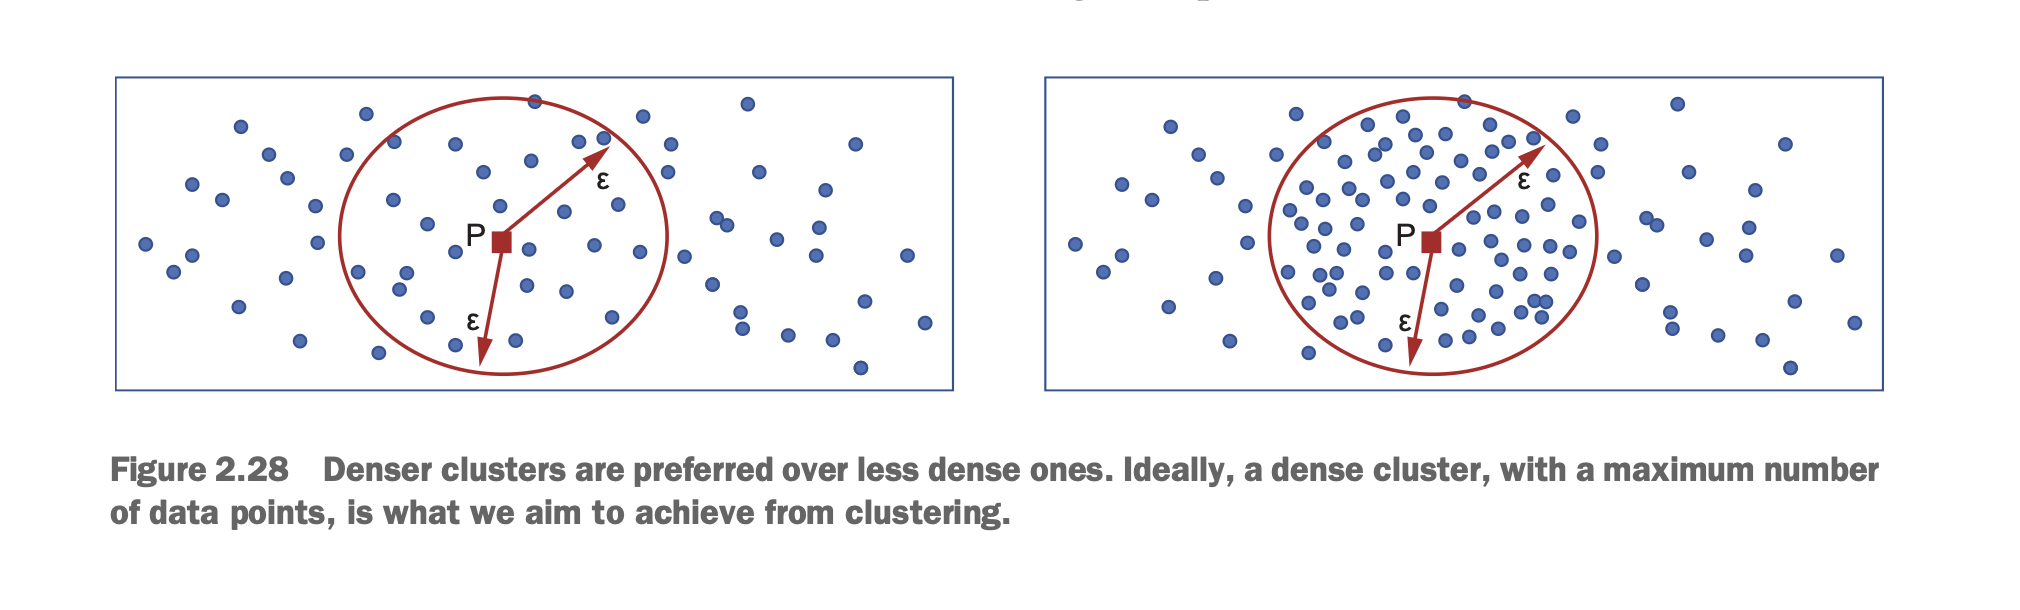

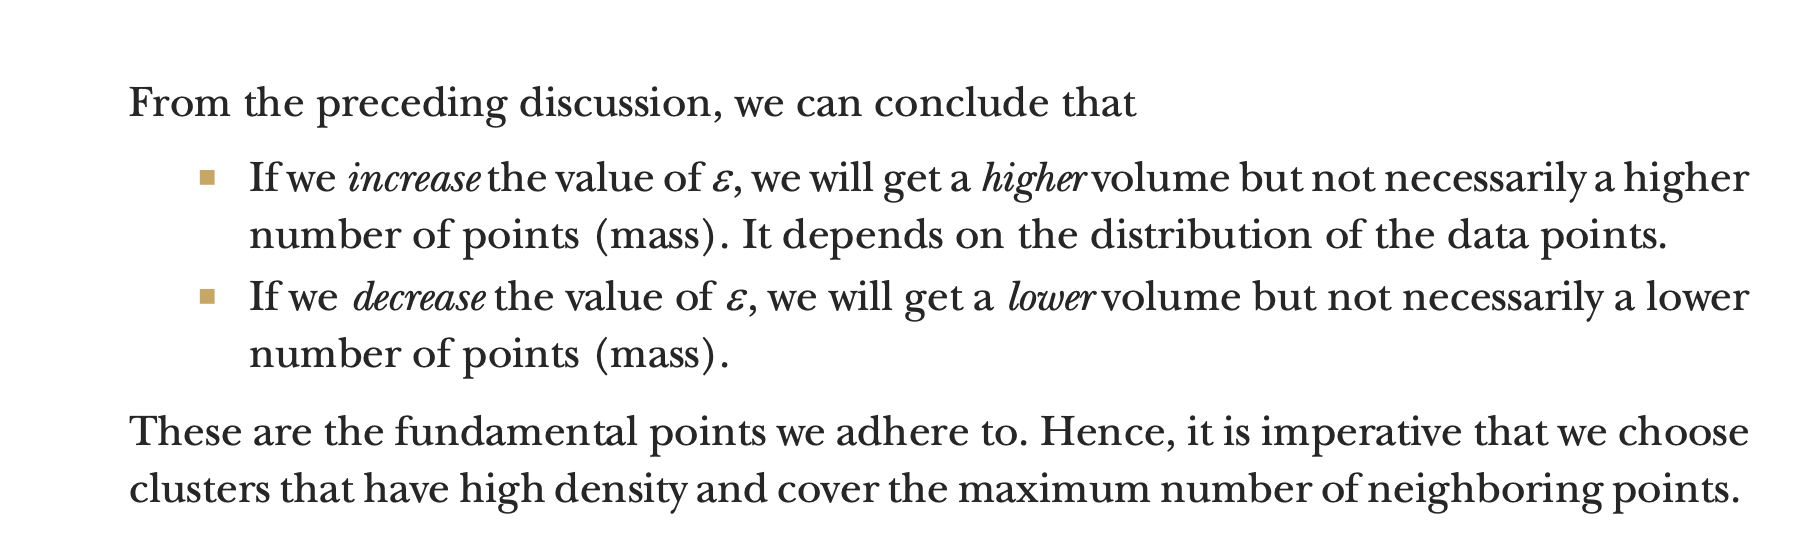

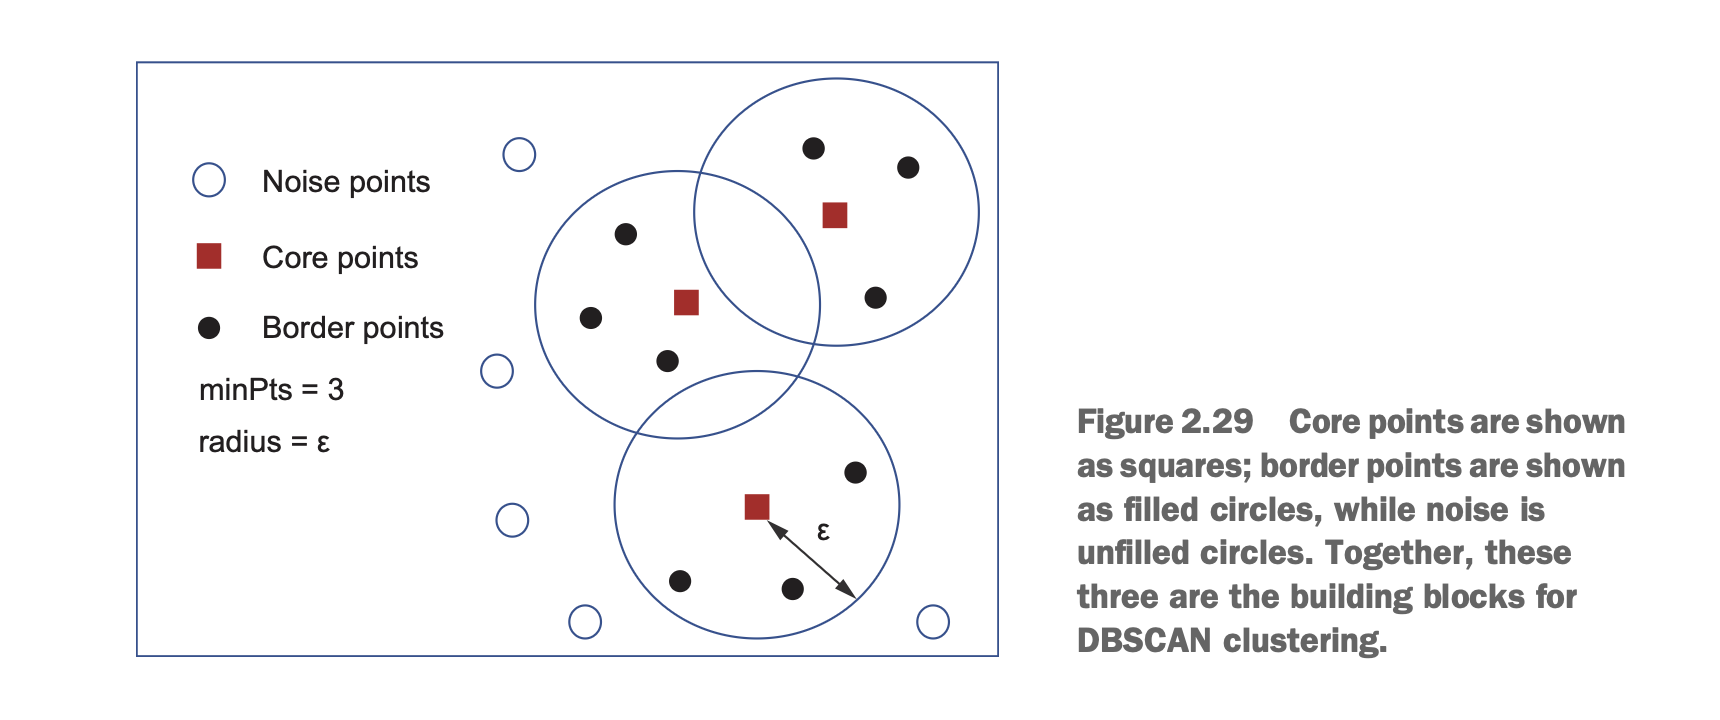

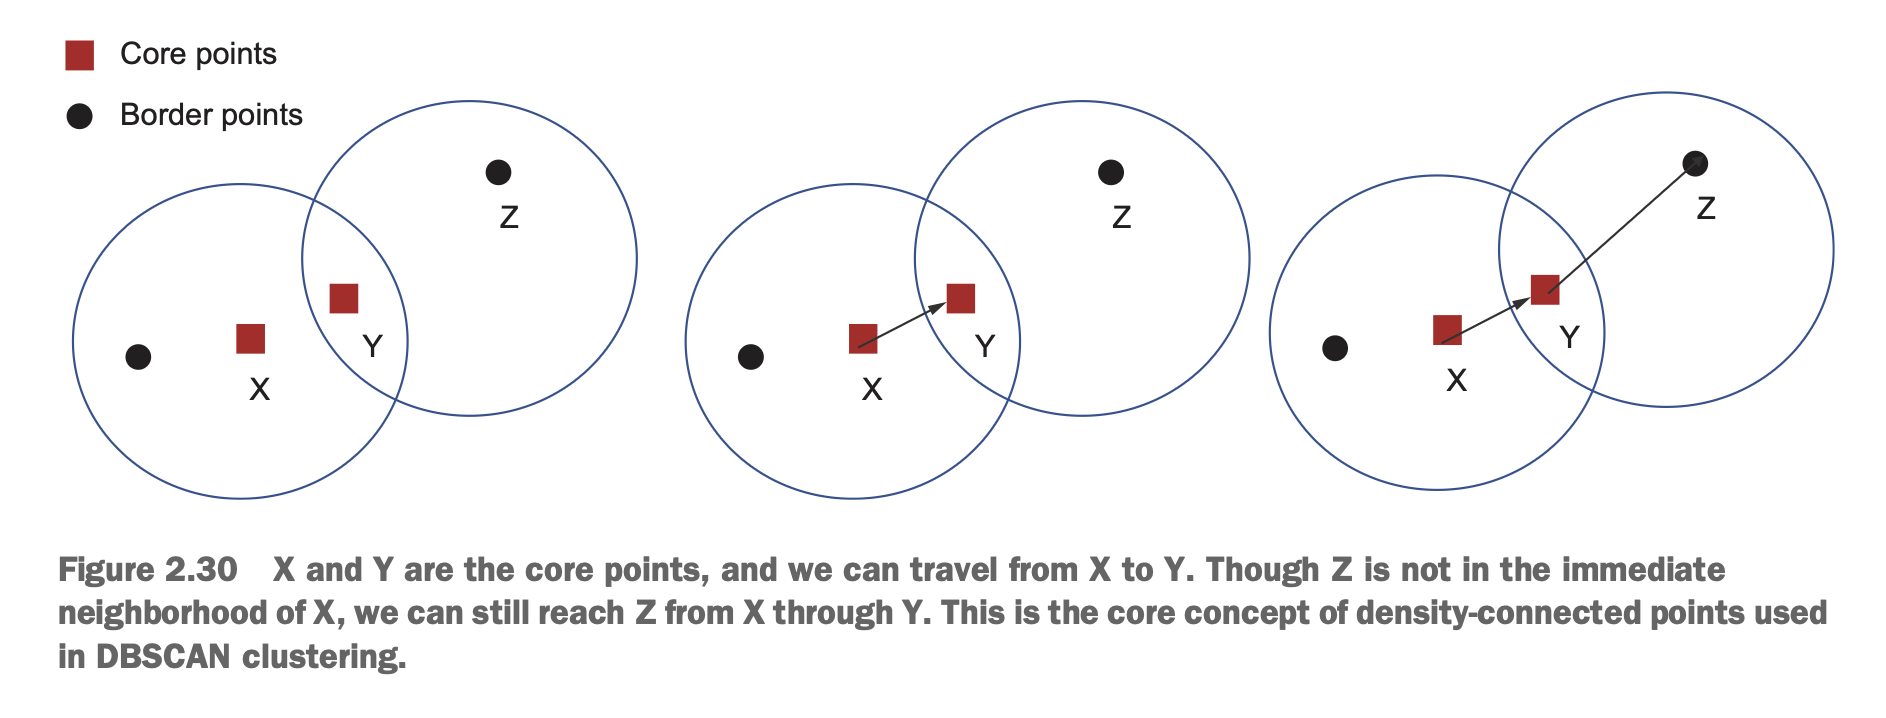

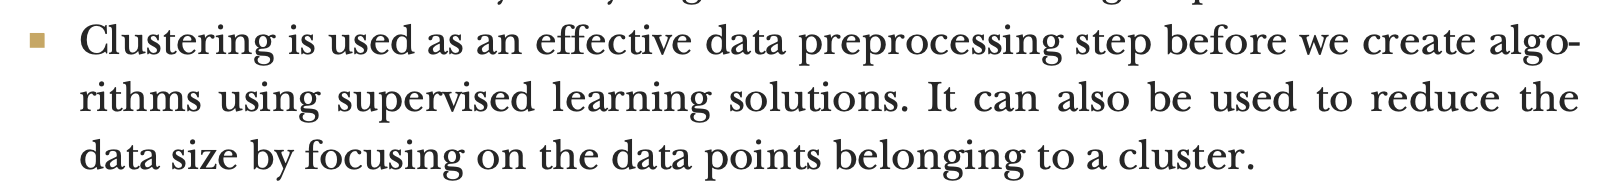